In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('2018.csv')

In [2]:
data.shape

(7213446, 28)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

In [4]:
df=data.drop(columns=['TAXI_OUT','OP_CARRIER_FL_NUM', "WHEELS_OFF" , 'WHEELS_ON', 'CANCELLATION_CODE',
                    'DIVERTED', 'CARRIER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
                     'Unnamed: 27'], axis=1)

In [5]:
df.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,WEATHER_DELAY
0,2018-01-01,UA,EWR,DEN,1517,1512.0,-5.0,10.0,1745,1722.0,-23.0,0.0,268.0,250.0,225.0,1605.0,NaN
1,2018-01-01,UA,LAS,SFO,1115,1107.0,-8.0,7.0,1254,1230.0,-24.0,0.0,99.0,83.0,65.0,414.0,NaN
2,2018-01-01,UA,SNA,DEN,1335,1330.0,-5.0,5.0,1649,1636.0,-13.0,0.0,134.0,126.0,106.0,846.0,NaN
3,2018-01-01,UA,RSW,ORD,1546,1552.0,6.0,6.0,1756,1754.0,-2.0,0.0,190.0,182.0,157.0,1120.0,NaN
4,2018-01-01,UA,ORD,ALB,630,650.0,20.0,10.0,922,936.0,14.0,0.0,112.0,106.0,83.0,723.0,NaN


In [6]:
df=df[(data['ORIGIN'] == 'EWR') | (data['DEST'] == 'EWR')]
df.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,WEATHER_DELAY
0,2018-01-01,UA,EWR,DEN,1517,1512.0,-5.0,10.0,1745,1722.0,-23.0,0.0,268.0,250.0,225.0,1605.0,NaN
8,2018-01-01,UA,SMF,EWR,2224,2237.0,13.0,9.0,638,636.0,-2.0,0.0,314.0,299.0,280.0,2500.0,NaN
10,2018-01-01,UA,PDX,EWR,2240,2235.0,-5.0,7.0,647,631.0,-16.0,0.0,307.0,296.0,280.0,2434.0,NaN
12,2018-01-01,UA,EWR,PDX,825,822.0,-3.0,5.0,1135,1109.0,-26.0,0.0,370.0,347.0,327.0,2434.0,NaN
13,2018-01-01,UA,EWR,ATL,1044,1055.0,11.0,5.0,1318,1315.0,-3.0,0.0,154.0,140.0,124.0,746.0,NaN


In [7]:
df_iad=df[(data['ORIGIN'] == 'IAD') | (data['DEST'] == 'IAD')]
df_iad.head()

<ipython-input-7-e556411eadff>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iad=df[(data['ORIGIN'] == 'IAD') | (data['DEST'] == 'IAD')]


,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,WEATHER_DELAY
214,2018-01-01,UA,EWR,IAD,1502,1532.0,30.0,6.0,1625,1646.0,21.0,0.0,83.0,74.0,46.0,212.0,0.0
240,2018-01-01,UA,IAD,EWR,1717,1738.0,21.0,6.0,1845,1843.0,-2.0,0.0,88.0,65.0,36.0,212.0,NaN
544,2018-01-01,UA,IAD,EWR,2200,2204.0,4.0,8.0,2331,2316.0,-15.0,0.0,91.0,72.0,45.0,212.0,NaN
1103,2018-01-01,UA,IAD,EWR,1241,1325.0,44.0,7.0,1406,1426.0,20.0,0.0,85.0,61.0,42.0,212.0,0.0
35803,2018-01-02,UA,EWR,IAD,1502,1515.0,13.0,5.0,1626,1619.0,-7.0,0.0,84.0,64.0,45.0,212.0,NaN


In [8]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287738 entries, 0 to 7213299
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FL_DATE              287738 non-null  object 
 1   OP_CARRIER           287738 non-null  object 
 2   ORIGIN               287738 non-null  object 
 3   DEST                 287738 non-null  object 
 4   CRS_DEP_TIME         287738 non-null  int64  
 5   DEP_TIME             278658 non-null  float64
 6   DEP_DELAY            278602 non-null  float64
 7   TAXI_IN              278312 non-null  float64
 8   CRS_ARR_TIME         287738 non-null  int64  
 9   ARR_TIME             278312 non-null  float64
 10  ARR_DELAY            277500 non-null  float64
 11  CANCELLED            287738 non-null  float64
 12  CRS_ELAPSED_TIME     287735 non-null  float64
 13  ACTUAL_ELAPSED_TIME  277528 non-null  float64
 14  AIR_TIME             277528 non-null  float64
 15  DISTANCE        

FL_DATE                     0
OP_CARRIER                  0
ORIGIN                      0
DEST                        0
CRS_DEP_TIME                0
DEP_TIME                 9080
DEP_DELAY                9136
TAXI_IN                  9426
CRS_ARR_TIME                0
ARR_TIME                 9426
ARR_DELAY               10238
CANCELLED                   0
CRS_ELAPSED_TIME            3
ACTUAL_ELAPSED_TIME     10210
AIR_TIME                10210
DISTANCE                    0
WEATHER_DELAY          210069
dtype: int64

ACTUAL_ELAPSED_TIME represents the actual elapsed time for the flight and CRS_ELAPSED_TIME
represents the scheduled elapsed time, we have ARR_TIME, ARR_DELAY so no new information
is given on the CRS_ELAPSED_TIME. Also, the columns TAXI_IN, DISTANCE are not needed.

In [9]:
df_2018= df.drop(columns=['ACTUAL_ELAPSED_TIME','CRS_ELAPSED_TIME','TAXI_IN',
                           'DISTANCE' ], axis=1)

df_clean.info()

In [10]:
nan_values=df_2018.isnull().sum()
nan_values

FL_DATE               0
OP_CARRIER            0
ORIGIN                0
DEST                  0
CRS_DEP_TIME          0
DEP_TIME           9080
DEP_DELAY          9136
CRS_ARR_TIME          0
ARR_TIME           9426
ARR_DELAY         10238
CANCELLED             0
AIR_TIME          10210
WEATHER_DELAY    210069
dtype: int64

In [11]:
d= df_2018[['DEP_TIME', 'DEP_DELAY','ARR_TIME','AIR_TIME','WEATHER_DELAY']]
a=d.loc[d['DEP_TIME'].isnull()]
a

,DEP_TIME,DEP_DELAY,ARR_TIME,AIR_TIME,WEATHER_DELAY
13987,NaN,NaN,NaN,NaN,NaN
14474,NaN,NaN,NaN,NaN,NaN
15893,NaN,NaN,NaN,NaN,NaN
15894,NaN,NaN,NaN,NaN,NaN
33006,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
7187743,NaN,NaN,NaN,NaN,NaN
7187876,NaN,NaN,NaN,NaN,NaN
7193706,NaN,NaN,NaN,NaN,NaN
7193712,NaN,NaN,NaN,NaN,NaN


In [12]:
print(a.shape)
d.shape

(9080, 5)


(287738, 5)

In [13]:
a_nan = a.dropna()
d.shape

(287738, 5)

In [14]:
#this supposed the drop all the nan row 
nan_val=df_2018.dropna(subset = ['DEP_TIME'], inplace=True)

In [15]:
print(nan_val)

None


In [16]:
df_2018=df_2018[df['DEP_TIME'].notna()]

<ipython-input-16-e809385c1c48>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2018=df_2018[df['DEP_TIME'].notna()]


In [17]:
df_2018.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,WEATHER_DELAY
0,2018-01-01,UA,EWR,DEN,1517,1512.0,-5.0,1745,1722.0,-23.0,0.0,225.0,NaN
8,2018-01-01,UA,SMF,EWR,2224,2237.0,13.0,638,636.0,-2.0,0.0,280.0,NaN
10,2018-01-01,UA,PDX,EWR,2240,2235.0,-5.0,647,631.0,-16.0,0.0,280.0,NaN
12,2018-01-01,UA,EWR,PDX,825,822.0,-3.0,1135,1109.0,-26.0,0.0,327.0,NaN
13,2018-01-01,UA,EWR,ATL,1044,1055.0,11.0,1318,1315.0,-3.0,0.0,124.0,NaN


In [18]:
df_2018.isnull().sum()

FL_DATE               0
OP_CARRIER            0
ORIGIN                0
DEST                  0
CRS_DEP_TIME          0
DEP_TIME              0
DEP_DELAY            56
CRS_ARR_TIME          0
ARR_TIME            346
ARR_DELAY          1158
CANCELLED             0
AIR_TIME           1130
WEATHER_DELAY    200989
dtype: int64

In [19]:
df_2018=df_2018[df['DEP_DELAY'].notna()]

<ipython-input-19-270694750fe6>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2018=df_2018[df['DEP_DELAY'].notna()]


In [20]:
df_2018.isnull().sum()

FL_DATE               0
OP_CARRIER            0
ORIGIN                0
DEST                  0
CRS_DEP_TIME          0
DEP_TIME              0
DEP_DELAY             0
CRS_ARR_TIME          0
ARR_TIME            344
ARR_DELAY          1153
CANCELLED             0
AIR_TIME           1127
WEATHER_DELAY    200938
dtype: int64

In [21]:
df_2018 = df_2018[df['ARR_DELAY'].notna()]

<ipython-input-21-f60c09013d56>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2018 = df_2018[df['ARR_DELAY'].notna()]


In [22]:
df_2018.isnull().sum()

FL_DATE               0
OP_CARRIER            0
ORIGIN                0
DEST                  0
CRS_DEP_TIME          0
DEP_TIME              0
DEP_DELAY             0
CRS_ARR_TIME          0
ARR_TIME              0
ARR_DELAY             0
CANCELLED             0
AIR_TIME              0
WEATHER_DELAY    199785
dtype: int64

In [23]:
df_2018['WEATHER_DELAY']= df_2018['WEATHER_DELAY'].fillna(int(2))

In [24]:
df_2018.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,WEATHER_DELAY
0,2018-01-01,UA,EWR,DEN,1517,1512.0,-5.0,1745,1722.0,-23.0,0.0,225.0,2.0
8,2018-01-01,UA,SMF,EWR,2224,2237.0,13.0,638,636.0,-2.0,0.0,280.0,2.0
10,2018-01-01,UA,PDX,EWR,2240,2235.0,-5.0,647,631.0,-16.0,0.0,280.0,2.0
12,2018-01-01,UA,EWR,PDX,825,822.0,-3.0,1135,1109.0,-26.0,0.0,327.0,2.0
13,2018-01-01,UA,EWR,ATL,1044,1055.0,11.0,1318,1315.0,-3.0,0.0,124.0,2.0


If the flight arrives on time, it prevents to chance of possible missing flight. So, consider
less than 10 min ARR_DELAY is an on time arrival. Then, built a dummy column based on ARR_DELAy
time to have a binary classification.

In [25]:
df_2018['Delayed']= [1 if x>10 else 0 for x in df_2018['ARR_DELAY']]


In [26]:
df_2018.groupby(['Delayed']).size()

Delayed
0    191342
1     86107
dtype: int64

In [27]:
df_2018['Airport']= [1 if x=='EWR' else 0 for x in df_2018['ORIGIN']]
df_2018.tail()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,WEATHER_DELAY,Delayed,Airport
7211320,2018-12-31,OO,EWR,MSP,815,807.0,-8.0,1031,1020.0,-11.0,0.0,165.0,2.0,0,1
7212866,2018-12-31,AA,DFW,EWR,1839,1837.0,-2.0,2259,2231.0,-28.0,0.0,150.0,2.0,0,0
7212884,2018-12-31,AA,MIA,EWR,2029,2023.0,-6.0,2324,2317.0,-7.0,0.0,141.0,2.0,0,0
7213032,2018-12-31,AA,PHX,EWR,2305,2330.0,25.0,533,518.0,-15.0,0.0,213.0,2.0,0,0
7213299,2018-12-31,AA,EWR,CLT,500,502.0,2.0,656,700.0,4.0,0.0,86.0,2.0,0,1


On airpot IAD, the %26 of flight was delayed, however on EWR has %43 of flight was delayed.

In [28]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# a=df.drop_duplicates(subset='ORIGIN', keep='last')
# names=list(a.ORIGIN)
# values=list(a.ARR_DELAY)
# fig, axs = plt.subplots(figsize=(40, 10), sharey=True)
# axs.bar(names, values)

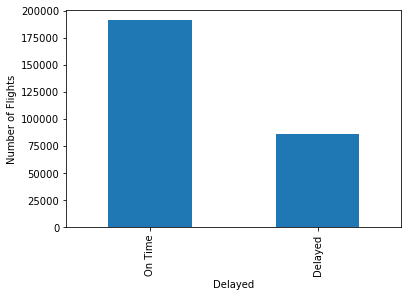

In [29]:
Del_count=df_2018.groupby(['Delayed'])['Airport'].count()

import seaborn as sns
import matplotlib.pyplot as plt
#plot=Del_count.plot(kind='bar', x='Delayed', y='Ontime')

plt.ylabel('Number of Flights')
plt.xlabel('Flight Situation')
b=Del_count.rename({0:'On Time', 1: 'Delayed'})
plot=b.plot(kind='bar')

In [30]:
df.isnull().sum()

FL_DATE                     0
OP_CARRIER                  0
ORIGIN                      0
DEST                        0
CRS_DEP_TIME                0
DEP_TIME                 9080
DEP_DELAY                9136
TAXI_IN                  9426
CRS_ARR_TIME                0
ARR_TIME                 9426
ARR_DELAY               10238
CANCELLED                   0
CRS_ELAPSED_TIME            3
ACTUAL_ELAPSED_TIME     10210
AIR_TIME                10210
DISTANCE                    0
WEATHER_DELAY          210069
dtype: int64

In [31]:
X= df_2018[['CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'CRS_ARR_TIME', 'ARR_TIME','ARR_DELAY', 'CANCELLED', 'AIR_TIME','WEATHER_DELAY','Airport']]
y=df_2018['Delayed']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,train_size=0.8, random_state=1234)
X_train

,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,WEATHER_DELAY,Airport
6484366,1520,1543.0,23.0,1910,1944.0,34.0,0.0,140.0,0.0,0
4538073,1000,959.0,-1.0,1218,1224.0,6.0,0.0,283.0,2.0,1
139945,1415,1556.0,101.0,1715,1912.0,117.0,0.0,94.0,0.0,0
4365709,1925,1947.0,22.0,2046,2103.0,17.0,0.0,46.0,0.0,0
6066080,1055,1303.0,128.0,1403,1623.0,140.0,0.0,95.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
3590541,815,815.0,0.0,930,932.0,2.0,0.0,46.0,2.0,0
258046,1849,1844.0,-5.0,2145,2124.0,-21.0,0.0,140.0,2.0,0
1052988,859,852.0,-7.0,1213,1217.0,4.0,0.0,154.0,2.0,1
5740004,1115,1108.0,-7.0,1411,1420.0,9.0,0.0,143.0,2.0,0


In [33]:
X_test

,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,WEATHER_DELAY,Airport
5263986,1434,1433.0,-1.0,1654,1640.0,-14.0,0.0,106.0,2.0,1
4823527,1430,1435.0,5.0,1608,1652.0,44.0,0.0,63.0,5.0,0
148556,2026,2225.0,119.0,2159,2331.0,92.0,0.0,112.0,0.0,1
5797637,1400,1408.0,8.0,1605,1608.0,3.0,0.0,90.0,2.0,1
1389737,1835,2028.0,113.0,2026,2231.0,125.0,0.0,72.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
3281050,1600,1559.0,-1.0,1920,1905.0,-15.0,0.0,333.0,2.0,1
2397782,635,633.0,-2.0,1413,1412.0,-1.0,0.0,263.0,2.0,0
5313643,1530,1601.0,31.0,1829,1856.0,27.0,0.0,145.0,0.0,0
5868203,1717,1752.0,35.0,1943,2019.0,36.0,0.0,304.0,0.0,1


In [34]:
from sklearn.preprocessing import StandardScaler


In [35]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10, p=1)

In [37]:
knn.fit(X_train, y_train)
y_predict_knn = knn.predict(X_test)
y_predict_knn

array([0, 1, 1, ..., 1, 1, 0])

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix_knn= confusion_matrix(y_test, y_predict_knn)
confusion_matrix_knn


array([[38343,    60],
       [ 1114, 15973]])

In [39]:
tp = confusion_matrix_knn[0][0]
fp = confusion_matrix_knn[0][1]
fn = confusion_matrix_knn[1][0]
tn = confusion_matrix_knn[1][1]

In [40]:
tpr_knn= tp/(tp+fn)
fpr_knn=fp/(tn+fp)

In [41]:
knn_score = knn.score(X_test,y_test)
knn_score

0.9788430347810416

In [42]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [43]:
knn_precision=precision_score(y_test, y_predict_knn)
knn_recall= recall_score(y_test, y_predict_knn)
print(knn_precision)
print(knn_recall)

0.9962577184556851
0.9348042371393457


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_knn))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     38403
           1       1.00      0.93      0.96     17087

    accuracy                           0.98     55490
   macro avg       0.98      0.97      0.97     55490
weighted avg       0.98      0.98      0.98     55490



In [45]:
from datetime import datetime
import time

In [46]:
df_2018['CRS_DEP_TIME']=df_2018['CRS_DEP_TIME'].astype(str)

In [47]:
df_2018['CRS_DEP_TIME'].str[:-2]+':'+ df_2018['CRS_DEP_TIME'].str[-2:]

0          15:17
8          22:24
10         22:40
12          8:25
13         10:44
           ...  
7211320     8:15
7212866    18:39
7212884    20:29
7213032    23:05
7213299     5:00
Name: CRS_DEP_TIME, Length: 277449, dtype: object

In [48]:
df_2018['time']= df_2018['CRS_DEP_TIME'].str[:-2] +':'+ df_2018['CRS_DEP_TIME'].str[-2:]

In [49]:
df_2018.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,WEATHER_DELAY,Delayed,Airport,time
0,2018-01-01,UA,EWR,DEN,1517,1512.0,-5.0,1745,1722.0,-23.0,0.0,225.0,2.0,0,1,15:17
8,2018-01-01,UA,SMF,EWR,2224,2237.0,13.0,638,636.0,-2.0,0.0,280.0,2.0,0,0,22:24
10,2018-01-01,UA,PDX,EWR,2240,2235.0,-5.0,647,631.0,-16.0,0.0,280.0,2.0,0,0,22:40
12,2018-01-01,UA,EWR,PDX,825,822.0,-3.0,1135,1109.0,-26.0,0.0,327.0,2.0,0,1,8:25
13,2018-01-01,UA,EWR,ATL,1044,1055.0,11.0,1318,1315.0,-3.0,0.0,124.0,2.0,0,1,10:44


In [50]:
df_2018.isnull().sum()

FL_DATE          0
OP_CARRIER       0
ORIGIN           0
DEST             0
CRS_DEP_TIME     0
DEP_TIME         0
DEP_DELAY        0
CRS_ARR_TIME     0
ARR_TIME         0
ARR_DELAY        0
CANCELLED        0
AIR_TIME         0
WEATHER_DELAY    0
Delayed          0
Airport          0
time             0
dtype: int64

In [51]:
df_2018['date']= pd.to_datetime(df_2018['FL_DATE'])

In [52]:
df_2018.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,WEATHER_DELAY,Delayed,Airport,time,date
0,2018-01-01,UA,EWR,DEN,1517,1512.0,-5.0,1745,1722.0,-23.0,0.0,225.0,2.0,0,1,15:17,2018-01-01
8,2018-01-01,UA,SMF,EWR,2224,2237.0,13.0,638,636.0,-2.0,0.0,280.0,2.0,0,0,22:24,2018-01-01
10,2018-01-01,UA,PDX,EWR,2240,2235.0,-5.0,647,631.0,-16.0,0.0,280.0,2.0,0,0,22:40,2018-01-01
12,2018-01-01,UA,EWR,PDX,825,822.0,-3.0,1135,1109.0,-26.0,0.0,327.0,2.0,0,1,8:25,2018-01-01
13,2018-01-01,UA,EWR,ATL,1044,1055.0,11.0,1318,1315.0,-3.0,0.0,124.0,2.0,0,1,10:44,2018-01-01


In [53]:
df_2018["date"]= df_2018.date.dt.strftime('%Y-%m-%d')
df_2018["date"].head()

0     2018-01-01
8     2018-01-01
10    2018-01-01
12    2018-01-01
13    2018-01-01
Name: date, dtype: object

In [54]:
df_2018.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,WEATHER_DELAY,Delayed,Airport,time,date
0,2018-01-01,UA,EWR,DEN,1517,1512.0,-5.0,1745,1722.0,-23.0,0.0,225.0,2.0,0,1,15:17,2018-01-01
8,2018-01-01,UA,SMF,EWR,2224,2237.0,13.0,638,636.0,-2.0,0.0,280.0,2.0,0,0,22:24,2018-01-01
10,2018-01-01,UA,PDX,EWR,2240,2235.0,-5.0,647,631.0,-16.0,0.0,280.0,2.0,0,0,22:40,2018-01-01
12,2018-01-01,UA,EWR,PDX,825,822.0,-3.0,1135,1109.0,-26.0,0.0,327.0,2.0,0,1,8:25,2018-01-01
13,2018-01-01,UA,EWR,ATL,1044,1055.0,11.0,1318,1315.0,-3.0,0.0,124.0,2.0,0,1,10:44,2018-01-01


In [55]:
df_2018['time']= pd.to_datetime(df_2018['time'], errors='coerce')

In [56]:
df_2018["time"]= df_2018.time.dt.strftime('%H:%M:%S')
df_2018["time"].head()

0     15:17:00
8     22:24:00
10    22:40:00
12    08:25:00
13    10:44:00
Name: time, dtype: object

In [57]:
df_2018['flight_time']= df_2018["date"]+' '+df_2018["time"]

In [58]:
df_2018.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,WEATHER_DELAY,Delayed,Airport,time,date,flight_time
0,2018-01-01,UA,EWR,DEN,1517,1512.0,-5.0,1745,1722.0,-23.0,0.0,225.0,2.0,0,1,15:17:00,2018-01-01,2018-01-01 15:17:00
8,2018-01-01,UA,SMF,EWR,2224,2237.0,13.0,638,636.0,-2.0,0.0,280.0,2.0,0,0,22:24:00,2018-01-01,2018-01-01 22:24:00
10,2018-01-01,UA,PDX,EWR,2240,2235.0,-5.0,647,631.0,-16.0,0.0,280.0,2.0,0,0,22:40:00,2018-01-01,2018-01-01 22:40:00
12,2018-01-01,UA,EWR,PDX,825,822.0,-3.0,1135,1109.0,-26.0,0.0,327.0,2.0,0,1,08:25:00,2018-01-01,2018-01-01 08:25:00
13,2018-01-01,UA,EWR,ATL,1044,1055.0,11.0,1318,1315.0,-3.0,0.0,124.0,2.0,0,1,10:44:00,2018-01-01,2018-01-01 10:44:00


In [59]:
df_2018.isnull().sum()

FL_DATE            0
OP_CARRIER         0
ORIGIN             0
DEST               0
CRS_DEP_TIME       0
DEP_TIME           0
DEP_DELAY          0
CRS_ARR_TIME       0
ARR_TIME           0
ARR_DELAY          0
CANCELLED          0
AIR_TIME           0
WEATHER_DELAY      0
Delayed            0
Airport            0
time             281
date               0
flight_time      281
dtype: int64

In [60]:
df_2018[df_2018['time'].isnull()]

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,WEATHER_DELAY,Delayed,Airport,time,date,flight_time
612,2018-01-01,UA,SFO,EWR,56,43.0,-13.0,924,903.0,-21.0,0.0,286.0,2.0,0,0,NaN,2018-01-01,NaN
30868,2018-01-02,AA,CLT,EWR,25,26.0,1.0,212,208.0,-4.0,0.0,77.0,2.0,0,0,NaN,2018-01-02,NaN
36232,2018-01-02,UA,SFO,EWR,56,100.0,4.0,924,919.0,-5.0,0.0,293.0,2.0,0,0,NaN,2018-01-02,NaN
38457,2018-01-03,UA,SFO,EWR,56,48.0,-8.0,924,933.0,9.0,0.0,294.0,2.0,0,0,NaN,2018-01-03,NaN
76870,2018-01-05,UA,SFO,EWR,56,55.0,-1.0,924,1019.0,55.0,0.0,273.0,0.0,1,0,NaN,2018-01-05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7099340,2018-12-26,UA,LAX,EWR,45,33.0,-12.0,903,827.0,-36.0,0.0,273.0,2.0,0,0,NaN,2018-12-26,NaN
7129647,2018-12-27,UA,LAX,EWR,45,37.0,-8.0,903,846.0,-17.0,0.0,282.0,2.0,0,0,NaN,2018-12-27,NaN
7153549,2018-12-28,UA,LAX,EWR,45,42.0,-3.0,903,847.0,-16.0,0.0,282.0,2.0,0,0,NaN,2018-12-28,NaN
7163988,2018-12-29,UA,LAX,EWR,45,42.0,-3.0,903,848.0,-15.0,0.0,256.0,2.0,0,0,NaN,2018-12-29,NaN


In [61]:
df_2018.dropna()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,WEATHER_DELAY,Delayed,Airport,time,date,flight_time
0,2018-01-01,UA,EWR,DEN,1517,1512.0,-5.0,1745,1722.0,-23.0,0.0,225.0,2.0,0,1,15:17:00,2018-01-01,2018-01-01 15:17:00
8,2018-01-01,UA,SMF,EWR,2224,2237.0,13.0,638,636.0,-2.0,0.0,280.0,2.0,0,0,22:24:00,2018-01-01,2018-01-01 22:24:00
10,2018-01-01,UA,PDX,EWR,2240,2235.0,-5.0,647,631.0,-16.0,0.0,280.0,2.0,0,0,22:40:00,2018-01-01,2018-01-01 22:40:00
12,2018-01-01,UA,EWR,PDX,825,822.0,-3.0,1135,1109.0,-26.0,0.0,327.0,2.0,0,1,08:25:00,2018-01-01,2018-01-01 08:25:00
13,2018-01-01,UA,EWR,ATL,1044,1055.0,11.0,1318,1315.0,-3.0,0.0,124.0,2.0,0,1,10:44:00,2018-01-01,2018-01-01 10:44:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7211320,2018-12-31,OO,EWR,MSP,815,807.0,-8.0,1031,1020.0,-11.0,0.0,165.0,2.0,0,1,08:15:00,2018-12-31,2018-12-31 08:15:00
7212866,2018-12-31,AA,DFW,EWR,1839,1837.0,-2.0,2259,2231.0,-28.0,0.0,150.0,2.0,0,0,18:39:00,2018-12-31,2018-12-31 18:39:00
7212884,2018-12-31,AA,MIA,EWR,2029,2023.0,-6.0,2324,2317.0,-7.0,0.0,141.0,2.0,0,0,20:29:00,2018-12-31,2018-12-31 20:29:00
7213032,2018-12-31,AA,PHX,EWR,2305,2330.0,25.0,533,518.0,-15.0,0.0,213.0,2.0,0,0,23:05:00,2018-12-31,2018-12-31 23:05:00


New data to predict weather delays

In [62]:
weather=pd.read_csv('WeatherEvents_Jan2016-Dec2020.csv')

In [167]:
weather.shape

(6274206, 13)

In [63]:
weather.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


In [64]:
weather.loc[weather['AirportCode']=='KEWR']

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
3046304,W-3047244,Rain,Light,2016-01-09 15:51:00,2016-01-09 17:51:00,US/Eastern,KEWR,40.6827,-74.1693,Newark,Union,NJ,7114.0
3046305,W-3047245,Rain,Light,2016-01-10 01:51:00,2016-01-10 02:51:00,US/Eastern,KEWR,40.6827,-74.1693,Newark,Union,NJ,7114.0
3046306,W-3047246,Rain,Light,2016-01-10 05:51:00,2016-01-10 06:51:00,US/Eastern,KEWR,40.6827,-74.1693,Newark,Union,NJ,7114.0
3046307,W-3047247,Rain,Light,2016-01-10 07:51:00,2016-01-10 08:51:00,US/Eastern,KEWR,40.6827,-74.1693,Newark,Union,NJ,7114.0
3046308,W-3047248,Rain,Moderate,2016-01-10 08:51:00,2016-01-10 09:58:00,US/Eastern,KEWR,40.6827,-74.1693,Newark,Union,NJ,7114.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3049278,W-3050218,Rain,Light,2020-12-31 08:51:00,2020-12-31 11:51:00,US/Eastern,KEWR,40.6827,-74.1693,Newark,Union,NJ,7114.0
3049279,W-3050219,Rain,Moderate,2020-12-31 11:51:00,2020-12-31 13:09:00,US/Eastern,KEWR,40.6827,-74.1693,Newark,Union,NJ,7114.0
3049280,W-3050220,Rain,Light,2020-12-31 13:09:00,2020-12-31 13:51:00,US/Eastern,KEWR,40.6827,-74.1693,Newark,Union,NJ,7114.0
3049281,W-3050221,Rain,Moderate,2020-12-31 13:51:00,2020-12-31 14:51:00,US/Eastern,KEWR,40.6827,-74.1693,Newark,Union,NJ,7114.0


In [65]:
start_date= '2018-1-1 00:00:01'
end_date='2018-12-31 23:59:59'
weather_a= weather['StartTime(UTC)'] >= start_date
weather_b= weather['StartTime(UTC)'] <= end_date
between_dates= weather_a & weather_b

In [66]:
filtered= weather.loc[between_dates]

In [67]:
filtered.loc[filtered['AirportCode']=='KEWR']

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
3047918,W-3048858,Rain,Light,2018-10-03 02:36:00,2018-10-03 03:40:00,US/Eastern,KEWR,40.6827,-74.1693,Newark,Union,NJ,7114.0
3047919,W-3048859,Rain,Moderate,2018-10-03 03:40:00,2018-10-03 03:51:00,US/Eastern,KEWR,40.6827,-74.1693,Newark,Union,NJ,7114.0
3047920,W-3048860,Rain,Heavy,2018-10-03 03:51:00,2018-10-03 04:51:00,US/Eastern,KEWR,40.6827,-74.1693,Newark,Union,NJ,7114.0
3047921,W-3048861,Rain,Light,2018-10-03 04:51:00,2018-10-03 05:51:00,US/Eastern,KEWR,40.6827,-74.1693,Newark,Union,NJ,7114.0
3047922,W-3048862,Rain,Light,2018-10-04 22:51:00,2018-10-04 23:51:00,US/Eastern,KEWR,40.6827,-74.1693,Newark,Union,NJ,7114.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048077,W-3049017,Rain,Light,2018-12-28 21:08:00,2018-12-28 23:09:00,US/Eastern,KEWR,40.6827,-74.1693,Newark,Union,NJ,7114.0
3048078,W-3049018,Snow,Light,2018-12-30 13:07:00,2018-12-30 13:51:00,US/Eastern,KEWR,40.6827,-74.1693,Newark,Union,NJ,7114.0
3048079,W-3049019,Snow,Light,2018-12-30 14:15:00,2018-12-30 14:37:00,US/Eastern,KEWR,40.6827,-74.1693,Newark,Union,NJ,7114.0
3048080,W-3049020,Rain,Light,2018-12-31 19:51:00,2018-12-31 23:47:00,US/Eastern,KEWR,40.6827,-74.1693,Newark,Union,NJ,7114.0


In [68]:
filtered.tail()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
6273355,W-6275298,Snow,Light,2018-12-31 17:35:00,2018-12-31 17:53:00,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0
6273356,W-6275299,Snow,Moderate,2018-12-31 17:53:00,2018-12-31 18:07:00,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0
6273357,W-6275300,Snow,Light,2018-12-31 18:07:00,2018-12-31 18:53:00,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0
6273358,W-6275301,Snow,Moderate,2018-12-31 18:53:00,2018-12-31 19:20:00,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0
6273359,W-6275302,Snow,Light,2018-12-31 19:20:00,2019-01-01 01:53:00,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0


In [69]:
filtered['startdate']=pd.to_datetime(filtered['StartTime(UTC)']).dt.date
len(filtered.loc[filtered['AirportCode']=='KEWR'].startdate.unique())

<ipython-input-69-abb98d9231f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['startdate']=pd.to_datetime(filtered['StartTime(UTC)']).dt.date


47

In [70]:
filtered.loc[filtered['AirportCode']=='KEWR'].tail()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,startdate
3048077,W-3049017,Rain,Light,2018-12-28 21:08:00,2018-12-28 23:09:00,US/Eastern,KEWR,40.6827,-74.1693,Newark,Union,NJ,7114.0,2018-12-28
3048078,W-3049018,Snow,Light,2018-12-30 13:07:00,2018-12-30 13:51:00,US/Eastern,KEWR,40.6827,-74.1693,Newark,Union,NJ,7114.0,2018-12-30
3048079,W-3049019,Snow,Light,2018-12-30 14:15:00,2018-12-30 14:37:00,US/Eastern,KEWR,40.6827,-74.1693,Newark,Union,NJ,7114.0,2018-12-30
3048080,W-3049020,Rain,Light,2018-12-31 19:51:00,2018-12-31 23:47:00,US/Eastern,KEWR,40.6827,-74.1693,Newark,Union,NJ,7114.0,2018-12-31
3048081,W-3049021,Rain,Moderate,2018-12-31 23:47:00,2019-01-01 05:51:00,US/Eastern,KEWR,40.6827,-74.1693,Newark,Union,NJ,7114.0,2018-12-31


In [71]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6274206 entries, 0 to 6274205
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   EventId         object 
 1   Type            object 
 2   Severity        object 
 3   StartTime(UTC)  object 
 4   EndTime(UTC)    object 
 5   TimeZone        object 
 6   AirportCode     object 
 7   LocationLat     float64
 8   LocationLng     float64
 9   City            object 
 10  County          object 
 11  State           object 
 12  ZipCode         float64
dtypes: float64(3), object(10)
memory usage: 622.3+ MB


In [72]:
weather['StartTime(UTC)']=pd.to_datetime(weather['StartTime(UTC)'])
weather['EndTime(UTC)']=pd.to_datetime(weather['EndTime(UTC)'])
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6274206 entries, 0 to 6274205
Data columns (total 13 columns):
 #   Column          Dtype         
---  ------          -----         
 0   EventId         object        
 1   Type            object        
 2   Severity        object        
 3   StartTime(UTC)  datetime64[ns]
 4   EndTime(UTC)    datetime64[ns]
 5   TimeZone        object        
 6   AirportCode     object        
 7   LocationLat     float64       
 8   LocationLng     float64       
 9   City            object        
 10  County          object        
 11  State           object        
 12  ZipCode         float64       
dtypes: datetime64[ns](2), float64(3), object(8)
memory usage: 622.3+ MB


In [73]:
start_date= '2018-1-1 00:00:01'
end_date='2018-12-31 23:59:59'
weather_a= weather['StartTime(UTC)'] >= start_date
weather_b= weather['StartTime(UTC)'] <= end_date
between_dates= weather_a & weather_b

In [74]:
filtered_w= weather.loc[between_dates]

In [75]:
filtered_w.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
965,W-966,Rain,Light,2018-01-07 03:36:00,2018-01-07 03:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
966,W-967,Snow,Light,2018-01-07 03:54:00,2018-01-07 07:12:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
967,W-968,Snow,Light,2018-01-11 03:36:00,2018-01-11 03:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
968,W-969,Snow,Light,2018-01-12 13:54:00,2018-01-12 15:12:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
969,W-970,Snow,Light,2018-01-12 15:54:00,2018-01-12 16:36:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


In [76]:
from pytz import all_timezones
import datetime as dt

In [77]:
filtered_w['EST'] = filtered_w['StartTime(UTC)'].dt.tz_localize('UTC')

<ipython-input-77-164b8f4e5313>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_w['EST'] = filtered_w['StartTime(UTC)'].dt.tz_localize('UTC')


In [78]:
filtered_w.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,EST
965,W-966,Rain,Light,2018-01-07 03:36:00,2018-01-07 03:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,2018-01-07 03:36:00+00:00
966,W-967,Snow,Light,2018-01-07 03:54:00,2018-01-07 07:12:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,2018-01-07 03:54:00+00:00
967,W-968,Snow,Light,2018-01-11 03:36:00,2018-01-11 03:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,2018-01-11 03:36:00+00:00
968,W-969,Snow,Light,2018-01-12 13:54:00,2018-01-12 15:12:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,2018-01-12 13:54:00+00:00
969,W-970,Snow,Light,2018-01-12 15:54:00,2018-01-12 16:36:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,2018-01-12 15:54:00+00:00


In [79]:
filtered_w['StartTime(EST)']=filtered_w['EST'].dt.tz_convert("US/Eastern").dt.strftime('%Y-%m-%d %H:%M:%S')

<ipython-input-79-7edc8d9f90c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_w['StartTime(EST)']=filtered_w['EST'].dt.tz_convert("US/Eastern").dt.strftime('%Y-%m-%d %H:%M:%S')


In [80]:
filtered_w.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,EST,StartTime(EST)
965,W-966,Rain,Light,2018-01-07 03:36:00,2018-01-07 03:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,2018-01-07 03:36:00+00:00,2018-01-06 22:36:00
966,W-967,Snow,Light,2018-01-07 03:54:00,2018-01-07 07:12:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,2018-01-07 03:54:00+00:00,2018-01-06 22:54:00
967,W-968,Snow,Light,2018-01-11 03:36:00,2018-01-11 03:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,2018-01-11 03:36:00+00:00,2018-01-10 22:36:00
968,W-969,Snow,Light,2018-01-12 13:54:00,2018-01-12 15:12:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,2018-01-12 13:54:00+00:00,2018-01-12 08:54:00
969,W-970,Snow,Light,2018-01-12 15:54:00,2018-01-12 16:36:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,2018-01-12 15:54:00+00:00,2018-01-12 10:54:00


In [81]:
filtered_w['EndTime(EST)'] = filtered_w['EndTime(UTC)'].dt.tz_localize('UTC').dt.tz_convert("US/Eastern").dt.strftime('%Y-%m-%d %H:%M:%S')

<ipython-input-81-a6a0c9530267>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_w['EndTime(EST)'] = filtered_w['EndTime(UTC)'].dt.tz_localize('UTC').dt.tz_convert("US/Eastern").dt.strftime('%Y-%m-%d %H:%M:%S')


In [82]:
filtered_w.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,EST,StartTime(EST),EndTime(EST)
965,W-966,Rain,Light,2018-01-07 03:36:00,2018-01-07 03:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,2018-01-07 03:36:00+00:00,2018-01-06 22:36:00,2018-01-06 22:54:00
966,W-967,Snow,Light,2018-01-07 03:54:00,2018-01-07 07:12:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,2018-01-07 03:54:00+00:00,2018-01-06 22:54:00,2018-01-07 02:12:00
967,W-968,Snow,Light,2018-01-11 03:36:00,2018-01-11 03:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,2018-01-11 03:36:00+00:00,2018-01-10 22:36:00,2018-01-10 22:54:00
968,W-969,Snow,Light,2018-01-12 13:54:00,2018-01-12 15:12:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,2018-01-12 13:54:00+00:00,2018-01-12 08:54:00,2018-01-12 10:12:00
969,W-970,Snow,Light,2018-01-12 15:54:00,2018-01-12 16:36:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,2018-01-12 15:54:00+00:00,2018-01-12 10:54:00,2018-01-12 11:36:00


In [83]:
filtered_w.isnull().sum()

EventId              0
Type                 0
Severity             0
StartTime(UTC)       0
EndTime(UTC)         0
TimeZone             0
AirportCode          0
LocationLat          0
LocationLng          0
City              2391
County               0
State                0
ZipCode           9768
EST                  0
StartTime(EST)       0
EndTime(EST)         0
dtype: int64

In [84]:
weather_clean=filtered_w.drop(columns = ['EventId', 'TimeZone', 'County', 'State', 'ZipCode',
                                     'StartTime(UTC)', 'EndTime(UTC)', 'EST'], axis=1)

In [85]:
weather_clean.shape

(1328274, 8)

In [86]:
weather_clean.loc[weather_clean['AirportCode']=='KEWR']

,Type,Severity,AirportCode,LocationLat,LocationLng,City,StartTime(EST),EndTime(EST)
3047371,Snow,Light,KEWR,40.6827,-74.1693,Newark,2018-01-04 03:51:00,2018-01-04 04:51:00
3047372,Snow,Light,KEWR,40.6827,-74.1693,Newark,2018-01-04 05:33:00,2018-01-04 06:48:00
3047373,Snow,Moderate,KEWR,40.6827,-74.1693,Newark,2018-01-04 06:48:00,2018-01-04 06:51:00
3047374,Snow,Light,KEWR,40.6827,-74.1693,Newark,2018-01-04 06:51:00,2018-01-04 07:48:00
3047375,Snow,Moderate,KEWR,40.6827,-74.1693,Newark,2018-01-04 07:48:00,2018-01-04 09:51:00
...,...,...,...,...,...,...,...,...
3048077,Rain,Light,KEWR,40.6827,-74.1693,Newark,2018-12-28 16:08:00,2018-12-28 18:09:00
3048078,Snow,Light,KEWR,40.6827,-74.1693,Newark,2018-12-30 08:07:00,2018-12-30 08:51:00
3048079,Snow,Light,KEWR,40.6827,-74.1693,Newark,2018-12-30 09:15:00,2018-12-30 09:37:00
3048080,Rain,Light,KEWR,40.6827,-74.1693,Newark,2018-12-31 14:51:00,2018-12-31 18:47:00


In [87]:
weather_clean.isnull().sum()

Type                 0
Severity             0
AirportCode          0
LocationLat          0
LocationLng          0
City              2391
StartTime(EST)       0
EndTime(EST)         0
dtype: int64

Add another data to match IATA and ICAO codes of airports

In [88]:
airport= pd.read_csv('airports 2.csv')
airport.head()

,Name,City,Country,IATA,ICAO,Latitude,Longitude
0,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998
1,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789002
2,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005
3,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977
4,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001


In [168]:
airport.shape

(7698, 7)

In [89]:
airport_US= airport.loc[airport['Country'] ==  'United States']
airport_US

,Name,City,Country,IATA,ICAO,Latitude,Longitude
3212,Barter Island LRRS Airport,Barter Island,United States,BTI,PABA,70.134003,-143.582001
3213,Wainwright Air Station,Fort Wainwright,United States,\N,PAWT,70.613403,-159.860001
3214,Cape Lisburne LRRS Airport,Cape Lisburne,United States,LUR,PALU,68.875099,-166.110001
3215,Point Lay LRRS Airport,Point Lay,United States,PIZ,PPIZ,69.732903,-163.005005
3216,Hilo International Airport,Hilo,United States,ITO,PHTO,19.721399,-155.048004
...,...,...,...,...,...,...,...
7637,Camp Pendleton MCAS (Munn Field) Airport,Oceanside,United States,\N,KNFG,33.301300,-117.355003
7651,Vidalia Regional Airport,Vidalia,United States,VDI,KVDI,32.192699,-82.371201
7652,Granbury Regional Airport,Granbury,United States,\N,KGDJ,32.444401,-97.816902
7653,Oswego County Airport,Fulton,United States,\N,KFZY,43.350800,-76.388100


In [90]:
airport_US.isnull().sum()

Name         0
City         0
Country      0
IATA         0
ICAO         0
Latitude     0
Longitude    0
dtype: int64

Merge dataframes airport_US and weather_clean on ICAO and AirportCode

In [91]:
df1=pd.merge(airport_US, weather_clean, how='inner', left_on='ICAO', right_on='AirportCode')

In [92]:
df1

,Name,City_x,Country,IATA,ICAO,Latitude,Longitude,Type,Severity,AirportCode,LocationLat,LocationLng,City_y,StartTime(EST),EndTime(EST)
0,Orlando Executive Airport,Orlando,United States,ORL,KORL,28.545500,-81.332901,Fog,Moderate,KORL,28.5465,-81.3354,Orlando,2018-01-01 01:53:00,2018-01-01 04:53:00
1,Orlando Executive Airport,Orlando,United States,ORL,KORL,28.545500,-81.332901,Rain,Light,KORL,28.5465,-81.3354,Orlando,2018-01-01 10:53:00,2018-01-01 11:53:00
2,Orlando Executive Airport,Orlando,United States,ORL,KORL,28.545500,-81.332901,Rain,Light,KORL,28.5465,-81.3354,Orlando,2018-01-01 12:53:00,2018-01-01 17:53:00
3,Orlando Executive Airport,Orlando,United States,ORL,KORL,28.545500,-81.332901,Rain,Light,KORL,28.5465,-81.3354,Orlando,2018-01-01 23:44:00,2018-01-01 23:53:00
4,Orlando Executive Airport,Orlando,United States,ORL,KORL,28.545500,-81.332901,Rain,Light,KORL,28.5465,-81.3354,Orlando,2018-01-02 22:53:00,2018-01-03 00:53:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728650,Mitchell Municipal Airport,Mitchell,United States,MHE,KMHE,43.774799,-98.038597,Snow,Light,KMHE,43.7748,-98.0386,Mitchell,2018-12-28 10:53:00,2018-12-28 11:16:00
728651,Mitchell Municipal Airport,Mitchell,United States,MHE,KMHE,43.774799,-98.038597,Snow,Light,KMHE,43.7748,-98.0386,Mitchell,2018-12-28 11:48:00,2018-12-28 13:53:00
728652,Mitchell Municipal Airport,Mitchell,United States,MHE,KMHE,43.774799,-98.038597,Fog,Moderate,KMHE,43.7748,-98.0386,Mitchell,2018-12-28 13:53:00,2018-12-28 14:53:00
728653,Mitchell Municipal Airport,Mitchell,United States,MHE,KMHE,43.774799,-98.038597,Fog,Moderate,KMHE,43.7748,-98.0386,Mitchell,2018-12-31 08:45:00,2018-12-31 09:07:00


In [93]:
df1_clean=df1.drop(columns=['City_x','Country','ICAO','LocationLat','LocationLng'], axis=1)

In [94]:
df1_clean.head()

,Name,IATA,Latitude,Longitude,Type,Severity,AirportCode,City_y,StartTime(EST),EndTime(EST)
0,Orlando Executive Airport,ORL,28.5455,-81.332901,Fog,Moderate,KORL,Orlando,2018-01-01 01:53:00,2018-01-01 04:53:00
1,Orlando Executive Airport,ORL,28.5455,-81.332901,Rain,Light,KORL,Orlando,2018-01-01 10:53:00,2018-01-01 11:53:00
2,Orlando Executive Airport,ORL,28.5455,-81.332901,Rain,Light,KORL,Orlando,2018-01-01 12:53:00,2018-01-01 17:53:00
3,Orlando Executive Airport,ORL,28.5455,-81.332901,Rain,Light,KORL,Orlando,2018-01-01 23:44:00,2018-01-01 23:53:00
4,Orlando Executive Airport,ORL,28.5455,-81.332901,Rain,Light,KORL,Orlando,2018-01-02 22:53:00,2018-01-03 00:53:00


In [95]:
df1_clean.isnull().sum()

Name                0
IATA                0
Latitude            0
Longitude           0
Type                0
Severity            0
AirportCode         0
City_y            561
StartTime(EST)      0
EndTime(EST)        0
dtype: int64

In [96]:
df1_clean.shape

(728655, 10)

In [97]:
df_2018['flight_time'].loc[0:1]

0    2018-01-01 15:17:00
Name: flight_time, dtype: object

In [98]:
df1_clean.head()

,Name,IATA,Latitude,Longitude,Type,Severity,AirportCode,City_y,StartTime(EST),EndTime(EST)
0,Orlando Executive Airport,ORL,28.5455,-81.332901,Fog,Moderate,KORL,Orlando,2018-01-01 01:53:00,2018-01-01 04:53:00
1,Orlando Executive Airport,ORL,28.5455,-81.332901,Rain,Light,KORL,Orlando,2018-01-01 10:53:00,2018-01-01 11:53:00
2,Orlando Executive Airport,ORL,28.5455,-81.332901,Rain,Light,KORL,Orlando,2018-01-01 12:53:00,2018-01-01 17:53:00
3,Orlando Executive Airport,ORL,28.5455,-81.332901,Rain,Light,KORL,Orlando,2018-01-01 23:44:00,2018-01-01 23:53:00
4,Orlando Executive Airport,ORL,28.5455,-81.332901,Rain,Light,KORL,Orlando,2018-01-02 22:53:00,2018-01-03 00:53:00


In [99]:
df1_clean.loc[df1_clean['IATA']=='EWR']

,Name,IATA,Latitude,Longitude,Type,Severity,AirportCode,City_y,StartTime(EST),EndTime(EST)
32464,Newark Liberty International Airport,EWR,40.692501,-74.168701,Snow,Light,KEWR,Newark,2018-01-04 03:51:00,2018-01-04 04:51:00
32465,Newark Liberty International Airport,EWR,40.692501,-74.168701,Snow,Light,KEWR,Newark,2018-01-04 05:33:00,2018-01-04 06:48:00
32466,Newark Liberty International Airport,EWR,40.692501,-74.168701,Snow,Moderate,KEWR,Newark,2018-01-04 06:48:00,2018-01-04 06:51:00
32467,Newark Liberty International Airport,EWR,40.692501,-74.168701,Snow,Light,KEWR,Newark,2018-01-04 06:51:00,2018-01-04 07:48:00
32468,Newark Liberty International Airport,EWR,40.692501,-74.168701,Snow,Moderate,KEWR,Newark,2018-01-04 07:48:00,2018-01-04 09:51:00
...,...,...,...,...,...,...,...,...,...,...
33170,Newark Liberty International Airport,EWR,40.692501,-74.168701,Rain,Light,KEWR,Newark,2018-12-28 16:08:00,2018-12-28 18:09:00
33171,Newark Liberty International Airport,EWR,40.692501,-74.168701,Snow,Light,KEWR,Newark,2018-12-30 08:07:00,2018-12-30 08:51:00
33172,Newark Liberty International Airport,EWR,40.692501,-74.168701,Snow,Light,KEWR,Newark,2018-12-30 09:15:00,2018-12-30 09:37:00
33173,Newark Liberty International Airport,EWR,40.692501,-74.168701,Rain,Light,KEWR,Newark,2018-12-31 14:51:00,2018-12-31 18:47:00


In [100]:
df1_clean['startdate']=pd.to_datetime(df1_clean['StartTime(EST)']).dt.date
len(df1_clean.loc[df1_clean['IATA']=='EWR'].startdate.unique())

192

In [101]:
len(df1_clean.loc[df1_clean['IATA']=='EWR'].startdate.unique())

192

In [102]:
df1_clean[  ('2018-01-01 15:17:00' >=df1_clean['StartTime(EST)']) & ('2018-01-01 15:17:00'<=df1_clean['EndTime(EST)'])]

,Name,IATA,Latitude,Longitude,Type,Severity,AirportCode,City_y,StartTime(EST),EndTime(EST),startdate
2,Orlando Executive Airport,ORL,28.545500,-81.332901,Rain,Light,KORL,Orlando,2018-01-01 12:53:00,2018-01-01 17:53:00,2018-01-01
10616,Mobile Downtown Airport,BFM,30.626801,-88.068100,Rain,Light,KBFM,Mobile,2018-01-01 13:53:00,2018-01-01 15:53:00,2018-01-01
18821,San Francisco International Airport,SFO,37.618999,-122.375000,Fog,Moderate,KSFO,San Francisco,2018-01-01 12:56:00,2018-01-01 16:56:00,2018-01-01
20373,Gainesville Regional Airport,GNV,29.690100,-82.271797,Rain,Light,KGNV,Gainesville,2018-01-01 14:39:00,2018-01-01 15:53:00,2018-01-01
22297,Caribou Municipal Airport,CAR,46.871498,-68.017899,Cold,Severe,KCAR,Caribou,2018-01-01 15:16:00,2018-01-01 15:54:00,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...
667437,Mason County Airport,LDM,43.962502,-86.407898,Snow,Light,KLDM,Ludington,2017-12-31 21:56:00,2018-01-02 03:15:00,2017-12-31
668564,Camarillo Airport,\N,34.213699,-119.094002,Fog,Moderate,KCMA,Camarillo,2018-01-01 13:55:00,2018-01-01 17:55:00,2018-01-01
697718,Cape Canaveral AFS Skid Strip,\N,28.467600,-80.566597,Rain,Light,KXMR,Patrick AFB,2018-01-01 14:49:00,2018-01-01 15:27:00,2018-01-01
698662,Zanesville Municipal Airport,ZZV,39.944401,-81.892097,Snow,Light,KZZV,Zanesville,2018-01-01 13:53:00,2018-01-01 16:51:00,2018-01-01


In [103]:
df1_clean.shape

(728655, 11)

In [104]:
df_2018.shape

(277449, 18)

In [105]:
df_2018['flight_time'].astype("datetime64[ns]")

0         2018-01-01 15:17:00
8         2018-01-01 22:24:00
10        2018-01-01 22:40:00
12        2018-01-01 08:25:00
13        2018-01-01 10:44:00
                  ...        
7211320   2018-12-31 08:15:00
7212866   2018-12-31 18:39:00
7212884   2018-12-31 20:29:00
7213032   2018-12-31 23:05:00
7213299   2018-12-31 05:00:00
Name: flight_time, Length: 277449, dtype: datetime64[ns]

In [106]:
b=df1_clean.loc[df1_clean['IATA']=='EWR']
b.head()

,Name,IATA,Latitude,Longitude,Type,Severity,AirportCode,City_y,StartTime(EST),EndTime(EST),startdate
32464,Newark Liberty International Airport,EWR,40.692501,-74.168701,Snow,Light,KEWR,Newark,2018-01-04 03:51:00,2018-01-04 04:51:00,2018-01-04
32465,Newark Liberty International Airport,EWR,40.692501,-74.168701,Snow,Light,KEWR,Newark,2018-01-04 05:33:00,2018-01-04 06:48:00,2018-01-04
32466,Newark Liberty International Airport,EWR,40.692501,-74.168701,Snow,Moderate,KEWR,Newark,2018-01-04 06:48:00,2018-01-04 06:51:00,2018-01-04
32467,Newark Liberty International Airport,EWR,40.692501,-74.168701,Snow,Light,KEWR,Newark,2018-01-04 06:51:00,2018-01-04 07:48:00,2018-01-04
32468,Newark Liberty International Airport,EWR,40.692501,-74.168701,Snow,Moderate,KEWR,Newark,2018-01-04 07:48:00,2018-01-04 09:51:00,2018-01-04


In [107]:
b['Type'].values[0]

'Snow'

In [108]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277449 entries, 0 to 7213299
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   FL_DATE        277449 non-null  object 
 1   OP_CARRIER     277449 non-null  object 
 2   ORIGIN         277449 non-null  object 
 3   DEST           277449 non-null  object 
 4   CRS_DEP_TIME   277449 non-null  object 
 5   DEP_TIME       277449 non-null  float64
 6   DEP_DELAY      277449 non-null  float64
 7   CRS_ARR_TIME   277449 non-null  int64  
 8   ARR_TIME       277449 non-null  float64
 9   ARR_DELAY      277449 non-null  float64
 10  CANCELLED      277449 non-null  float64
 11  AIR_TIME       277449 non-null  float64
 12  WEATHER_DELAY  277449 non-null  float64
 13  Delayed        277449 non-null  int64  
 14  Airport        277449 non-null  int64  
 15  time           277168 non-null  object 
 16  date           277449 non-null  object 
 17  flight_time    277168 non-nu

In [109]:
df_2018['flight_time'] = df_2018['flight_time'].astype("datetime64[ns]")

In [110]:
df_2018['flight_time'] = df_2018['flight_time'].astype("datetime64[ns]")

In [111]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728655 entries, 0 to 728654
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Name            728655 non-null  object 
 1   IATA            728655 non-null  object 
 2   Latitude        728655 non-null  float64
 3   Longitude       728655 non-null  float64
 4   Type            728655 non-null  object 
 5   Severity        728655 non-null  object 
 6   AirportCode     728655 non-null  object 
 7   City_y          728094 non-null  object 
 8   StartTime(EST)  728655 non-null  object 
 9   EndTime(EST)    728655 non-null  object 
 10  startdate       728655 non-null  object 
dtypes: float64(2), object(9)
memory usage: 66.7+ MB


In [112]:
df1_clean['EndTime(EST)'] = df1_clean['EndTime(EST)'].astype("datetime64[ns]")
df1_clean['StartTime(EST)'] = df1_clean['StartTime(EST)'].astype("datetime64[ns]")

In [113]:
# def event(x):
#     print(x)
#     a=df1_clean[(df1_clean['IATA']== x['ORIGIN'])]
#     if a.empty:
#         return '-'
#     else:
#         return a.values[0]
#     #print(a)
#     return a.values[0]
    

In [114]:
def event(x):
    a=df1_clean[(df1_clean['IATA']== x['ORIGIN']) & (x['flight_time']>=df1_clean['StartTime(EST)']) & (x['flight_time']<=df1_clean['EndTime(EST)'])]
    if not a.empty:
        x['weatherevent']=a['Type'].values[0]
        x['weatherseverity']= a['Severity'].values[0] 
        #print(x)
    return x
    

In [115]:
df_2018['weatherevent']='clear'
df_2018['weatherseverity']='clear'

In [116]:
df_2018.shape

(277449, 20)

In [117]:
df_2018_check= df_2018.loc[df_2018.date=='2018-01-04'].apply(lambda x: event(x), axis=1)
df_2018_check

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,WEATHER_DELAY,Delayed,Airport,time,date,flight_time,weatherevent,weatherseverity
57551,2018-01-04,B6,MCO,EWR,939,937.0,-2.0,1215,1245.0,30.0,0.0,143.0,0.0,1,0,09:39:00,2018-01-04,2018-01-04 09:39:00,clear,clear
57659,2018-01-04,B6,PBI,EWR,630,626.0,-4.0,915,915.0,0.0,0.0,132.0,2.0,0,0,06:30:00,2018-01-04,2018-01-04 06:30:00,clear,clear
57689,2018-01-04,B6,FLL,EWR,900,850.0,-10.0,1152,1207.0,15.0,0.0,144.0,0.0,1,0,09:00:00,2018-01-04,2018-01-04 09:00:00,clear,clear
57898,2018-01-04,B6,MCO,EWR,600,557.0,-3.0,831,920.0,49.0,0.0,126.0,0.0,1,0,06:00:00,2018-01-04,2018-01-04 06:00:00,clear,clear
58061,2018-01-04,B6,EWR,PBI,600,603.0,3.0,850,902.0,12.0,0.0,139.0,2.0,1,1,06:00:00,2018-01-04,2018-01-04 06:00:00,Snow,Light
58186,2018-01-04,B6,EWR,FLL,600,554.0,-6.0,904,858.0,-6.0,0.0,145.0,2.0,0,1,06:00:00,2018-01-04,2018-01-04 06:00:00,Snow,Light
58281,2018-01-04,B6,SJU,EWR,449,456.0,7.0,801,822.0,21.0,0.0,228.0,0.0,1,0,04:49:00,2018-01-04,2018-01-04 04:49:00,clear,clear
58321,2018-01-04,B6,BOS,EWR,607,600.0,-7.0,738,719.0,-19.0,0.0,53.0,2.0,0,0,06:07:00,2018-01-04,2018-01-04 06:07:00,clear,clear
59366,2018-01-04,G4,TYS,EWR,900,858.0,-2.0,1100,1043.0,-17.0,0.0,86.0,2.0,0,0,09:00:00,2018-01-04,2018-01-04 09:00:00,clear,clear
59367,2018-01-04,G4,EWR,TYS,1200,1200.0,0.0,1400,1425.0,25.0,0.0,83.0,0.0,1,1,12:00:00,2018-01-04,2018-01-04 12:00:00,Fog,Severe


In [118]:
df_2018_check.shape

(38, 20)

In [119]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728655 entries, 0 to 728654
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Name            728655 non-null  object        
 1   IATA            728655 non-null  object        
 2   Latitude        728655 non-null  float64       
 3   Longitude       728655 non-null  float64       
 4   Type            728655 non-null  object        
 5   Severity        728655 non-null  object        
 6   AirportCode     728655 non-null  object        
 7   City_y          728094 non-null  object        
 8   StartTime(EST)  728655 non-null  datetime64[ns]
 9   EndTime(EST)    728655 non-null  datetime64[ns]
 10  startdate       728655 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(7)
memory usage: 66.7+ MB


In [120]:
df_2018.shape


(277449, 20)

In [121]:
df_clean= df_2018.apply(lambda x: event(x), axis=1)
#df_clean.head()

In [122]:
df_clean.shape

(277449, 20)

In [123]:
#df_2018 = df_2018.apply(lambda x: event(x), axis=1)

In [124]:
df_clean.shape

(277449, 20)

In [125]:
numerical_cols = ['FL_DATE', 'WEATHER_DELAY', 'Delayed', 'Airport', 'flight_time' ]

In [126]:
df_clean[numerical_cols].isnull().sum()

FL_DATE            0
WEATHER_DELAY      0
Delayed            0
Airport            0
flight_time      281
dtype: int64

In [127]:
categorical_cols = ['weatherevent', 'weatherseverity']

In [128]:
df_clean[categorical_cols].nunique()

weatherevent       8
weatherseverity    7
dtype: int64

In [129]:
df_clean[categorical_cols]

,weatherevent,weatherseverity
0,clear,clear
8,clear,clear
10,clear,clear
12,clear,clear
13,clear,clear
...,...,...
7211320,clear,clear
7212866,clear,clear
7212884,clear,clear
7213032,clear,clear


In [130]:
df_cat = pd.get_dummies(df_clean[categorical_cols])

In [131]:
df_cat.head()

,weatherevent_Cold,weatherevent_Fog,weatherevent_Hail,weatherevent_Precipitation,weatherevent_Rain,weatherevent_Snow,weatherevent_Storm,weatherevent_clear,weatherseverity_Heavy,weatherseverity_Light,weatherseverity_Moderate,weatherseverity_Other,weatherseverity_Severe,weatherseverity_UNK,weatherseverity_clear
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


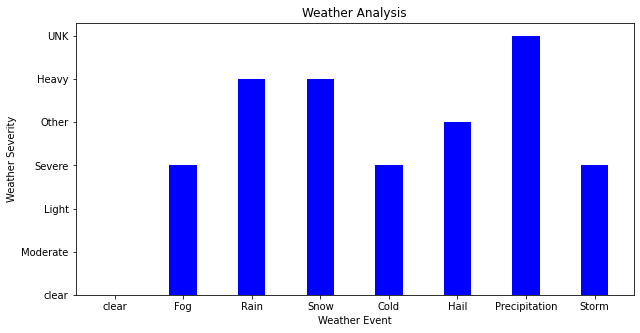

In [182]:
from matplotlib import pyplot as plt
import seaborn as sns
x= list(df_clean['weatherevent'])
y=list(df_clean['weatherseverity'])
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y, color ='blue',
        width = 0.4)
 
plt.xlabel("Weather Event")
plt.ylabel("Weather Severity")
plt.title("Weather Analysis")
plt.show()


In [132]:
df_clean.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,WEATHER_DELAY,Delayed,Airport,time,date,flight_time,weatherevent,weatherseverity
0,2018-01-01,UA,EWR,DEN,1517,1512.0,-5.0,1745,1722.0,-23.0,0.0,225.0,2.0,0,1,15:17:00,2018-01-01,2018-01-01 15:17:00,clear,clear
8,2018-01-01,UA,SMF,EWR,2224,2237.0,13.0,638,636.0,-2.0,0.0,280.0,2.0,0,0,22:24:00,2018-01-01,2018-01-01 22:24:00,clear,clear
10,2018-01-01,UA,PDX,EWR,2240,2235.0,-5.0,647,631.0,-16.0,0.0,280.0,2.0,0,0,22:40:00,2018-01-01,2018-01-01 22:40:00,clear,clear
12,2018-01-01,UA,EWR,PDX,825,822.0,-3.0,1135,1109.0,-26.0,0.0,327.0,2.0,0,1,08:25:00,2018-01-01,2018-01-01 08:25:00,clear,clear
13,2018-01-01,UA,EWR,ATL,1044,1055.0,11.0,1318,1315.0,-3.0,0.0,124.0,2.0,0,1,10:44:00,2018-01-01,2018-01-01 10:44:00,clear,clear


In [133]:
df_clean.shape

(277449, 20)

In [134]:
df_clean = pd.concat([df_clean, df_cat], axis=1)

In [135]:
#df_clean.tail()

In [136]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277449 entries, 0 to 7213299
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   FL_DATE                     277449 non-null  object        
 1   OP_CARRIER                  277449 non-null  object        
 2   ORIGIN                      277449 non-null  object        
 3   DEST                        277449 non-null  object        
 4   CRS_DEP_TIME                277449 non-null  object        
 5   DEP_TIME                    277449 non-null  float64       
 6   DEP_DELAY                   277449 non-null  float64       
 7   CRS_ARR_TIME                277449 non-null  int64         
 8   ARR_TIME                    277449 non-null  float64       
 9   ARR_DELAY                   277449 non-null  float64       
 10  CANCELLED                   277449 non-null  float64       
 11  AIR_TIME                    277449 non

In [137]:
df_clean['flight_time'] = df_clean['flight_time'].astype('datetime64[ns]')

In [138]:
df_clean['period'] = (df_clean['flight_time'].dt.hour % 24 + 4) // 4
df_clean['period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

In [139]:
df_clean.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,...,weatherevent_Storm,weatherevent_clear,weatherseverity_Heavy,weatherseverity_Light,weatherseverity_Moderate,weatherseverity_Other,weatherseverity_Severe,weatherseverity_UNK,weatherseverity_clear,period
0,2018-01-01,UA,EWR,DEN,1517,1512.0,-5.0,1745,1722.0,-23.0,...,0,1,0,0,0,0,0,0,1,Noon
8,2018-01-01,UA,SMF,EWR,2224,2237.0,13.0,638,636.0,-2.0,...,0,1,0,0,0,0,0,0,1,Night
10,2018-01-01,UA,PDX,EWR,2240,2235.0,-5.0,647,631.0,-16.0,...,0,1,0,0,0,0,0,0,1,Night
12,2018-01-01,UA,EWR,PDX,825,822.0,-3.0,1135,1109.0,-26.0,...,0,1,0,0,0,0,0,0,1,Morning
13,2018-01-01,UA,EWR,ATL,1044,1055.0,11.0,1318,1315.0,-3.0,...,0,1,0,0,0,0,0,0,1,Morning


/Users/sahindedogruer/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


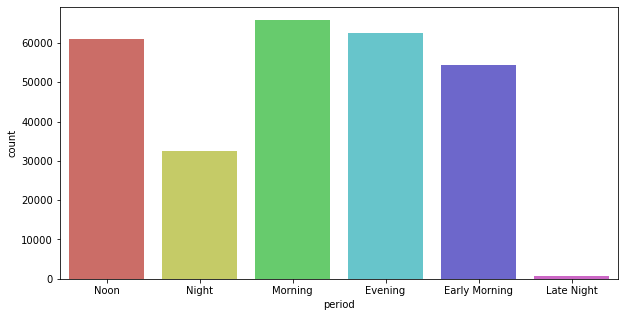

In [140]:
from matplotlib import pyplot as plt
import seaborn as sns
labels= df_clean['period']
plt.figure(figsize=(10,5))
sns.countplot(labels, palette='hls')
plt.show()

In [141]:
data_clean = df_clean.sample(n= len(df_clean))
data_clean = df_clean.reset_index(drop=True)

In [142]:
period_cols = ['period']

In [143]:
df_cat1 = pd.get_dummies(data_clean[period_cols])

In [144]:
df_cat1.head()

,period_Early Morning,period_Evening,period_Late Night,period_Morning,period_Night,period_Noon
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0


In [145]:
data_clean = pd.concat([data_clean, df_cat1], axis=1)

In [146]:
data_clean.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,...,weatherseverity_Severe,weatherseverity_UNK,weatherseverity_clear,period,period_Early Morning,period_Evening,period_Late Night,period_Morning,period_Night,period_Noon
0,2018-01-01,UA,EWR,DEN,1517,1512.0,-5.0,1745,1722.0,-23.0,...,0,0,1,Noon,0,0,0,0,0,1
1,2018-01-01,UA,SMF,EWR,2224,2237.0,13.0,638,636.0,-2.0,...,0,0,1,Night,0,0,0,0,1,0
2,2018-01-01,UA,PDX,EWR,2240,2235.0,-5.0,647,631.0,-16.0,...,0,0,1,Night,0,0,0,0,1,0
3,2018-01-01,UA,EWR,PDX,825,822.0,-3.0,1135,1109.0,-26.0,...,0,0,1,Morning,0,0,0,1,0,0
4,2018-01-01,UA,EWR,ATL,1044,1055.0,11.0,1318,1315.0,-3.0,...,0,0,1,Morning,0,0,0,1,0,0


In [147]:
# X= data_clean[['period', 'WEATHER_DELAY', 'Airport' ,'weatherevent_Fog', 'weatherevent_Snow','weatherevent_clear',
#              'weatherseverity_Light', 'weatherseverity_Moderate', 'weatherseverity_Severe', 'weatherseverity_clear']]
# y=data_clean['Delayed']

In [148]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test= train_test_split(X,y,train_size=0.8, random_state=1234)
# X_train


In [149]:
# X= df_clean[['WEATHER_DELAY', 'Airport' ,'weatherevent_Fog', 'weatherevent_Snow','weatherevent_clear',
#              'weatherseverity_Light', 'weatherseverity_Moderate', 'weatherseverity_Severe', 'weatherseverity_clear']]
# y=df_clean['Delayed']

In [150]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test= train_test_split(X,y,train_size=0.8, random_state=1234)
# X_train

In [151]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
X_test

array([[ 0.24496862,  0.21069124, -0.32289588, ..., -0.44892538,
        -0.01886503,  1.00043711],
       [ 0.23705263,  0.21446148, -0.21679635, ..., -0.94859037,
         0.18623209, -0.99956308],
       [ 1.41653538,  1.70370492,  1.79909463, ..., -0.37920469,
        -0.15559644,  1.00043711],
       ...,
       [ 0.43495242,  0.52739111,  0.24296826, ...,  0.00425914,
        -0.15559644, -0.99956308],
       [ 0.80502503,  0.81204397,  0.31370127, ...,  1.85185758,
        -0.15559644,  1.00043711],
       [-0.92066113, -0.78653633,  0.03076921, ..., -0.05384144,
        -0.01886503, -0.99956308]])

In [152]:
X= data_clean[['WEATHER_DELAY', 'Airport' ,'weatherevent_Fog', 'weatherevent_Snow','weatherevent_clear',
             'weatherseverity_Light', 'weatherseverity_Moderate', 'weatherseverity_Severe', 'weatherseverity_clear', 
             'period_Early Morning', 'period_Evening',
            'period_Morning','period_Night', 'period_Noon']]
y=data_clean['Delayed']

In [153]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
X_test

array([[ 0.24496862,  0.21069124, -0.32289588, ..., -0.44892538,
        -0.01886503,  1.00043711],
       [ 0.23705263,  0.21446148, -0.21679635, ..., -0.94859037,
         0.18623209, -0.99956308],
       [ 1.41653538,  1.70370492,  1.79909463, ..., -0.37920469,
        -0.15559644,  1.00043711],
       ...,
       [ 0.43495242,  0.52739111,  0.24296826, ...,  0.00425914,
        -0.15559644, -0.99956308],
       [ 0.80502503,  0.81204397,  0.31370127, ...,  1.85185758,
        -0.15559644,  1.00043711],
       [-0.92066113, -0.78653633,  0.03076921, ..., -0.05384144,
        -0.01886503, -0.99956308]])

In [154]:
y_test.shape

(55490,)

In [155]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=30, p=1)

In [156]:
knn.fit(X_train, y_train)
y_predict_knn = knn.predict(X_test)
y_predict_knn

array([0, 1, 1, ..., 1, 1, 0])

In [157]:
from sklearn.metrics import confusion_matrix
confusion_matrix_knn = confusion_matrix(y_test, y_predict_knn)
confusion_matrix_knn

array([[38362,    41],
       [ 1328, 15759]])

In [158]:
tp = confusion_matrix_knn[0][0]
fp = confusion_matrix_knn[0][1]
fn = confusion_matrix_knn[1][0]
tn = confusion_matrix_knn[1][1]

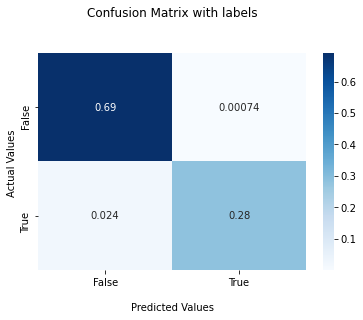

In [218]:
import seaborn as sns

ax = sns.heatmap(confusion_matrix_knn/np.sum(confusion_matrix_knn), annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [159]:
tpr_knn = tp/(tp+fn)
fpr_knn = fp/(tn+fp)

In [160]:
knn_score = knn.score(X_test,y_test)
knn_score

0.9753288880879438

In [161]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


knn_precision=precision_score(y_test, y_predict_knn)
knn_recall= recall_score(y_test, y_predict_knn)
print(knn_precision)
print(knn_recall)

0.9974050632911392
0.9222800959793995


In [162]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_knn))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     38403
           1       1.00      0.92      0.96     17087

    accuracy                           0.98     55490
   macro avg       0.98      0.96      0.97     55490
weighted avg       0.98      0.98      0.98     55490



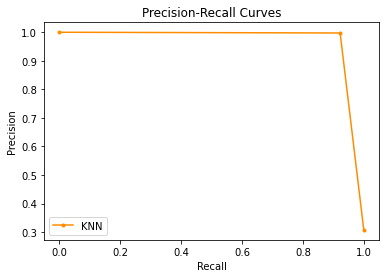

0.9438190775457419

In [191]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot 
from sklearn import metrics


tn,fp,fn,tp=confusion_matrix_knn.ravel()
knn_precision, knn_recall, thresholds = metrics.precision_recall_curve(y_test,y_predict_knn)

pyplot.plot(knn_recall, knn_precision,marker='.', label='KNN', color="darkorange")
# axis labels
pyplot.title('Precision-Recall Curves')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

plt.show()
plt.close()
metrics.average_precision_score(y_test,y_predict_knn)

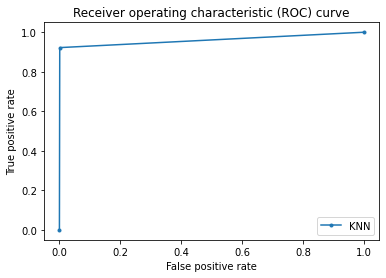

0.9606062355271318


In [215]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot 
from sklearn import metrics

tn,fp,fn,tp= confusion_matrix_tree.ravel()
tn,fp,fn,tp=confusion_matrix_knn.ravel()


fpr_knn,tpr_knn, thresholds = metrics.roc_curve(y_test,y_predict_knn)

pyplot.plot(fpr_knn,tpr_knn,marker='.', label='KNN')
# axis labels
plt.title('Receiver operating characteristic (ROC) curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

plt.show()
plt.close()
print(metrics.roc_auc_score(y_test,y_predict_knn))


In [227]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_predict_lr = lr.predict(X_test)
y_predict_lr 

array([0, 1, 1, ..., 1, 1, 0])

In [228]:
from sklearn.metrics import confusion_matrix
confusion_matrix_lr = confusion_matrix(y_test, y_predict_lr)
confusion_matrix_lr

array([[38403,     0],
       [    1, 17086]])

In [229]:
tp = confusion_matrix_lr[0][0]
fp = confusion_matrix_lr[0][1]
fn = confusion_matrix_lr[1][0]
tn = confusion_matrix_lr[1][1]

In [230]:
tpr_lr = tp/(tp+fn)
fpr_lr = fp/(tn+fp)

In [231]:
lr_score = lr.score(X_test,y_test)
lr_score

0.9999819787349072

In [163]:
# from numpy import array
# from numpy import argmax
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder

In [164]:
# values_weatherevent = array(df_clean['weatherevent'])
# print(values_weatherevent)
# values_weatherseverity = array(df_clean['weatherseverity'])
# print(values_weatherseverity)
# label_encoder = LabelEncoder()
# integer_encoded = label_encoder.fit_transform(values_weatherevent)
# print(integer_encoded)
# onehot_encoder = OneHotEncoder(sparse=False)
# integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
# onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
# print(onehot_encoded)

['clear' 'clear' 'clear' ... 'clear' 'clear' 'clear']
['clear' 'clear' 'clear' ... 'clear' 'clear' 'clear']
[7 7 7 ... 7 7 7]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [165]:
# values_categorical = array(df_clean[categorical_cols])
# print(values_categorical)

In [166]:
# label_encoder = LabelEncoder()
# integer_encoded = label_encoder.fit_transform(values_categorical)
# print(integer_encoded)